In [1]:
import numpy as np
import pandas as pd

C:\Users\rohit\AppData\Local\Temp\ipykernel_10600\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('student_clustering.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


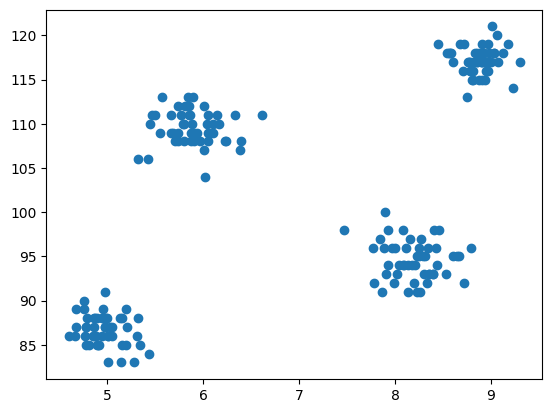

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [4]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

wcss

[29957.898288000004,
 4184.141270000001,
 2362.713349,
 681.9696600000003,
 530.4298616986188,
 437.3836088655579,
 303.5312983704866,
 316.5745130277541,
 207.78404404922932,
 223.025495122642]

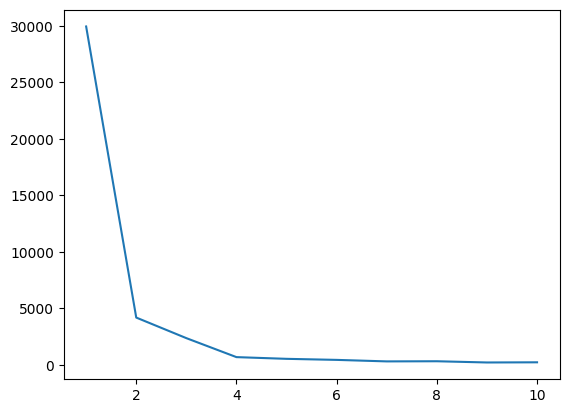

In [5]:
plt.plot(range(1,11),wcss)

In [6]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)
y_means

array([3, 1, 0, 0, 1, 1, 0, 2, 1, 0, 3, 1, 0, 3, 1, 0, 1, 0, 1, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 3, 1, 3, 0, 0, 3,
       2, 2, 0, 1, 2, 1, 3, 3, 2, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 2, 3, 2,
       0, 3, 1, 0, 1, 2, 0, 3, 1, 2, 1, 2, 3, 0, 0, 2, 1, 3, 2, 3, 2, 1,
       2, 1, 2, 2, 0, 3, 0, 0, 2, 0, 3, 2, 1, 3, 3, 2, 3, 3, 0, 3, 2, 2,
       0, 2, 1, 1, 0, 2, 0, 1, 2, 3, 3, 1, 0, 2, 0, 3, 0, 1, 3, 0, 0, 1,
       3, 3, 1, 2, 1, 3, 0, 0, 0, 3, 1, 3, 3, 2, 3, 2, 1, 3, 2, 3, 2, 2,
       3, 0, 1, 2, 1, 0, 3, 2, 1, 0, 2, 3, 1, 3, 3, 2, 2, 1, 2, 3, 3, 0,
       2, 1, 3, 2, 2, 1, 1, 1, 0, 3, 0, 0, 2, 1, 0, 0, 3, 3, 0, 3, 2, 1,
       1, 2])

In [7]:
X[y_means == 3,1]

array([88., 86., 88., 86., 87., 88., 87., 84., 85., 86., 83., 86., 87.,
       85., 83., 88., 85., 88., 86., 91., 86., 88., 89., 86., 90., 87.,
       87., 85., 87., 83., 86., 87., 85., 87., 87., 88., 88., 85., 86.,
       86., 86., 85., 88., 88., 89., 88., 88., 89., 85., 89.])

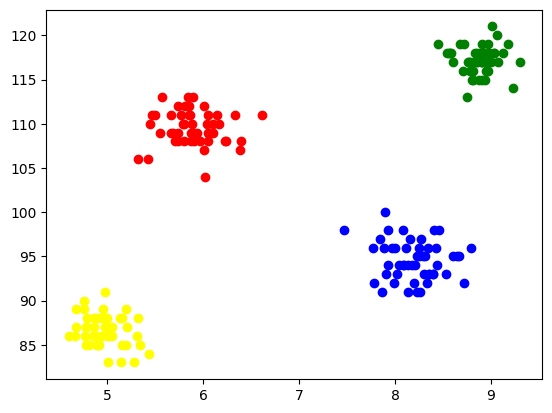

In [8]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

ON 3D DATA

In [9]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [10]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [11]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

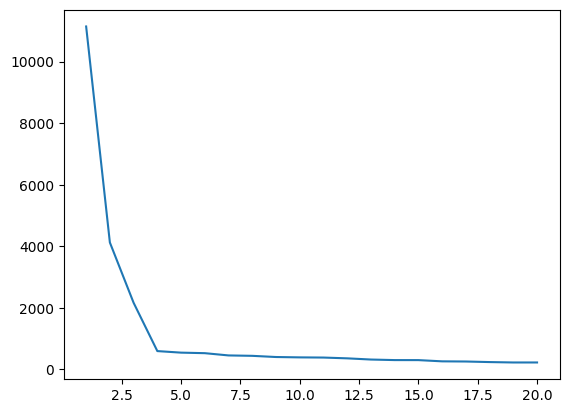

In [12]:
plt.plot(range(1,21),wcss)

In [13]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [14]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [15]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()